In [41]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your .xlsx file
file_path = 'new_measures.xlsx'

# Read the Excel file
Wills_data = pd.read_excel(file_path)

df_mleczko = pd.read_csv("C:\\Users\\clint\\Desktop\\NZLUD_Checker\\old\\Wills_Python_NZLUD\\Mleczko_data.csv")
Wills_data

,muni,restrict_ware_permit,restrict_ware_units,limit_ware_dwellings,limit_ware_dwelling_units,restrict_offi_permit,restrict_offi_units,limit_offi_dwellings,limit_offi_dwelling_units,restrict_lab_permit,...,max_den_cat4,max_den_cat5,height_ft_median,height_ft_mode,height_st_median,height_st_mode,parking_median,parking_mode,mf per,timestamp
0,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,28.0,55.0,2.0,1.0,0.217391,2024-06-28 18:24:28
1,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.5,0.5,0.157895,2024-06-28 18:23:53
2,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.714286,2024-06-28 18:22:48
3,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,2.0,2.0,2.0,1.0,0.666667,2024-06-28 18:21:24
4,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,1,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.625000,2024-06-28 18:21:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,0.750000,2024-06-28 16:48:57
2635,/restricted/projectnb/trucks/William/Mleczko_a...,1,1,1,1,1,1,1,1,1,...,0.0,0.0,30.0,30.0,5.0,8.0,2.0,1.0,0.315789,2024-06-28 16:48:16
2636,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,1.5,1.0,1.000000,2024-06-28 16:47:49
2637,/restricted/projectnb/trucks/William/Mleczko_a...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,2.0,0.200000,2024-06-28 16:46:29


In [42]:
def extract_filename(path):
    """
    Extracts the filename without extension from a given file path.

    Parameters:
    path (str): The file path from which to extract the filename.

    Returns:
    str: The filename without its extension.
    """
    import os
    # Extract the base name of the file (e.g., 'AZ_Glendale.txt')
    base_name = os.path.basename(path)
    # Split the base name by '.' and return the first part (e.g., 'AZ_Glendale')
    return os.path.splitext(base_name)[0]

In [43]:
df_mleczko['muni'] = df_mleczko['muni'].apply(extract_filename)
df_mleczko = df_mleczko.set_index('muni')
Wills_data['muni'] = Wills_data['muni'].apply(extract_filename)
Wills_data.head()

,muni,restrict_ware_permit,restrict_ware_units,limit_ware_dwellings,limit_ware_dwelling_units,restrict_offi_permit,restrict_offi_units,limit_offi_dwellings,limit_offi_dwelling_units,restrict_lab_permit,...,max_den_cat4,max_den_cat5,height_ft_median,height_ft_mode,height_st_median,height_st_mode,parking_median,parking_mode,mf per,timestamp
0,AZ_Glendale,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,28.0,55.0,2.0,1.0,0.217391,2024-06-28 18:24:28
1,AZ_SanLuis,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.5,0.5,0.157895,2024-06-28 18:23:53
2,CA_Belmont,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.714286,2024-06-28 18:22:48
3,CA_Coronado,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,2.0,2.0,2.0,1.0,0.666667,2024-06-28 18:21:24
4,CA_Dublin,0,0,0,0,0,1,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.625000,2024-06-28 18:21:01


In [44]:
df_will = Wills_data.set_index('muni')
df_mleczko = df_mleczko.sort_index()
# Step 1: Sort both DataFrames by their index
df_will = df_will.sort_index()
df_will.head()

,restrict_ware_permit,restrict_ware_units,limit_ware_dwellings,limit_ware_dwelling_units,restrict_offi_permit,restrict_offi_units,limit_offi_dwellings,limit_offi_dwelling_units,restrict_lab_permit,restrict_lab_units,...,max_den_cat4,max_den_cat5,height_ft_median,height_ft_mode,height_st_median,height_st_mode,parking_median,parking_mode,mf per,timestamp
muni,,,,,,,,,,,,,,,,,,,,,
AK_Anchorage,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,35.0,35.0,NaN,NaN,2.0,1.0,0.324324,2024-06-28 18:26:55
AK_Homer,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.428571,2024-06-28 18:26:54
AK_Kenai,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,2.0,0.384615,2024-06-28 18:26:51
AK_Palmer,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,0.200000,2024-06-28 18:26:47
AK_Petersburg,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,2.0,0.500000,2024-06-28 18:26:44


In [45]:
full_mleczko=df_mleczko
df_mleczko = df_mleczko[['open_space']]
df_mleczko

,open_space
muni,
AK_Anchorage,1
AK_Homer,0
AK_Kenai,0
AK_Palmer,1
AK_Petersburg,0
...,...
WY_Douglas,1
WY_Jackson,1
WY_Lander,1


In [46]:
# Find rows in df_will not in df_mleczko
rows_in_will_not_in_mleczko = set(df_will.index) - set(df_mleczko.index)

# Find rows in df_mleczko not in df_will
rows_in_mleczko_not_in_will = set(df_mleczko.index) - set(df_will.index)

# Print the differences
print("Rows in df_will not in df_mleczko:", rows_in_will_not_in_mleczko)
print("Rows in df_mleczko not in df_will:", rows_in_mleczko_not_in_will)

Rows in df_will not in df_mleczko: set()
Rows in df_mleczko not in df_will: set()


In [47]:
# Get the index of the column "open_space"
col_index = df_will.columns.get_loc("open_space")

# Drop all columns after "open_space"
df_will = df_will.iloc[:, :col_index + 1]

In [48]:
df_will

,restrict_ware_permit,restrict_ware_units,limit_ware_dwellings,limit_ware_dwelling_units,restrict_offi_permit,restrict_offi_units,limit_offi_dwellings,limit_offi_dwelling_units,restrict_lab_permit,restrict_lab_units,...,limit_rese_dwelling_units,restrict_comm_permit,restrict_comm_units,limit_comm_dwellings,limit_comm_dwelling_units,restrict_ind_permit,restrict_ind_units,limit_ind_dwellings,limit_ind_dwelling_units,open_space
muni,,,,,,,,,,,,,,,,,,,,,
AK_Anchorage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AK_Homer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK_Kenai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK_Palmer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AK_Petersburg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY_Douglas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
WY_Jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
WY_Lander,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# Initialize an empty dictionary to store the match status of each column
column_match_status = {}

# Iterate over each column name
for column in df_mleczko.columns:
    # Compare the current column in both DataFrames
    column_match_status[column] = df_mleczko[column].equals(df_will[column])

# Print the match status of each column
for column, is_match in column_match_status.items():
    print(f"Column '{column}' match: {is_match}")


Column 'open_space' match: True


In [50]:
# Assuming df_mleczko and df_will are your two DataFrames

# Get the index (row names) of both DataFrames
index_mleczko = df_mleczko.index
index_will = df_will.index

# Compare if both DataFrames have the same row names
same_row_names = index_mleczko.equals(index_will)

# Print the result
print(f"Do both DataFrames have the same row names? {same_row_names}")

Do both DataFrames have the same row names? True


In [51]:
df_will = df_will.drop("open_space", axis=1)
df_will

,restrict_ware_permit,restrict_ware_units,limit_ware_dwellings,limit_ware_dwelling_units,restrict_offi_permit,restrict_offi_units,limit_offi_dwellings,limit_offi_dwelling_units,restrict_lab_permit,restrict_lab_units,...,limit_rese_dwellings,limit_rese_dwelling_units,restrict_comm_permit,restrict_comm_units,limit_comm_dwellings,limit_comm_dwelling_units,restrict_ind_permit,restrict_ind_units,limit_ind_dwellings,limit_ind_dwelling_units
muni,,,,,,,,,,,,,,,,,,,,,
AK_Anchorage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK_Homer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK_Kenai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK_Palmer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AK_Petersburg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY_Douglas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WY_Jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WY_Lander,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
num_rows_all_zero = len(df_will[(df_will == 0).all(axis=1)])
print(f"The number of rows with all zero values is: {num_rows_all_zero} out of 2639")

The number of rows with all zero values is: 2481 out of 2639


In [53]:
df_will_filtered = df_will.loc[~(df_will == 0).all(axis=1)]
df_will_filtered

,restrict_ware_permit,restrict_ware_units,limit_ware_dwellings,limit_ware_dwelling_units,restrict_offi_permit,restrict_offi_units,limit_offi_dwellings,limit_offi_dwelling_units,restrict_lab_permit,restrict_lab_units,...,limit_rese_dwellings,limit_rese_dwelling_units,restrict_comm_permit,restrict_comm_units,limit_comm_dwellings,limit_comm_dwelling_units,restrict_ind_permit,restrict_ind_units,limit_ind_dwellings,limit_ind_dwelling_units
muni,,,,,,,,,,,,,,,,,,,,,
AZ_ChinoValley,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,0,0,1,1,0,0
AZ_Phoenix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
AZ_Willcox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
CA_AmericanCanyon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
CA_BigBearLake,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WA_Shoreline,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
WA_Washougal,1,1,0,0,1,1,0,0,1,1,...,0,0,1,1,0,0,1,1,0,0
WA_Woodland,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [54]:
# Assuming df_will is already defined and has an index
# Filter the DataFrame as before
df_will_filtered = df_will.loc[~(df_will == 0).all(axis=1)]

# Extract the first two letters from the index of df_will_filtered
first_two_letters = [str(index)[:2] for index in df_will_filtered.index]

# Print the result
print(first_two_letters)

['AZ', 'AZ', 'AZ', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CO', 'CO', 'CO', 'CO', 'CO', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'GA', 'GA', 'GA', 'IA', 'IA', 'ID', 'ID', 'ID', 'IL', 'IL', 'IL', 'IL', 'IN', 'IN', 'MA', 'MA', 'MA', 'MA', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'ME', 'ME', 'ME', 'ME', 'ME', 'MI', 'MI', 'MI', 'MN', 'MO', 'NC', 'NC', 'NC', 'NC', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NM', 'NM', 'NM', 'NM', 'NV', 'NY', 'NY', 'NY', 'NY', 'OH', 'OH', 'OH', 'OH', 'OH', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'OR', 'PA', 'PA', 'PA', 'PA', 'PA', 'PA', 'RI', 'RI', 'RI', 'RI', 'TN', 'TX', 'TX', 'TX', 'TX', 'TX', 'TX', 'TX', 'VA', 'VT', 'VT', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WI', 'WY']


In [55]:
import plotly.express as px
from collections import Counter
import pandas as pd

# List of state abbreviations
state_abbreviations = first_two_letters

# Count the occurrences of each state abbreviation
state_counts = Counter(state_abbreviations)

# Prepare the data for visualization
data = {
    "state": list(state_counts.keys()),
    "count": list(state_counts.values())
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map using plotly
fig = px.choropleth(
    df,
    locations="state",
    locationmode="USA-states",
    color="count",
    scope="usa",
)

# Update the layout to adjust the width and height
fig.update_layout(
    width=800,  # Adjust the width as needed
    height=500  # Adjust the height as needed
)

# Show the map
fig.show()

In [56]:
df_will_filtered = df_will.loc[(df_will == 0).all(axis=1)]
df_will_filtered
# Extract the first two letters from the index of df_will_filtered
first_two_letters = [str(index)[:2] for index in df_will_filtered.index]

# Print the result
print(first_two_letters)


# List of state abbreviations
state_abbreviations = first_two_letters

# Count the occurrences of each state abbreviation
state_counts = Counter(state_abbreviations)

# Prepare the data for visualization
data = {
    "state": list(state_counts.keys()),
    "count": list(state_counts.values())
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map using plotly
fig = px.choropleth(
    df,
    locations="state",
    locationmode="USA-states",
    color="count",
    scope="usa",
)

# Update the layout to adjust the width and height
fig.update_layout(
    width=800,  # Adjust the width as needed
    height=500  # Adjust the height as needed
)

# Show the map
fig.show()

['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'AZ', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA

In [57]:
full_mleczko

,restrict_sf_permit,restrict_mf_permit,limit_sf_units,limit_mf_units,limit_mf_dwellings,limit_mf_dwelling_units,min_lot_size,max_density,open_space,inclusionary,...,max_den_cat5,height_ft_median,height_ft_mode,height_st_median,height_st_mode,parking_median,parking_mode,mf per,last_date,timestamp
muni,,,,,,,,,,,,,,,,,,,,,
AK_Anchorage,0,0,0,0,0,0,1,0,1,1,...,1.0,20.0,20.0,2.00,1.0,2.0,1.0,0.324324,43634.0,4/27/2022 10:17
AK_Homer,0,0,0,0,0,0,1,0,0,0,...,1.0,35.0,35.0,NaN,NaN,1.0,1.0,0.428571,43577.0,4/27/2022 10:17
AK_Kenai,0,0,0,0,0,0,1,0,0,0,...,0.0,35.0,35.0,10.50,10.5,2.0,2.0,0.384615,43635.0,4/27/2022 10:17
AK_Palmer,0,0,0,0,0,0,1,0,1,0,...,0.0,10.0,10.0,4.00,4.0,2.0,1.0,0.200000,43669.0,4/27/2022 10:17
AK_Petersburg,0,0,0,0,0,0,1,0,0,0,...,1.0,30.0,30.0,2.50,3.0,2.0,2.0,0.500000,41275.0,4/27/2022 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY_Douglas,0,0,0,0,0,0,1,0,1,1,...,1.0,60.0,60.0,3.00,3.0,2.0,1.0,0.461538,43466.0,4/27/2022 10:26
WY_Jackson,0,0,0,0,0,0,1,0,1,1,...,1.0,36.0,60.0,3.00,3.0,2.0,1.0,0.500000,44378.0,4/27/2022 10:26
WY_Lander,0,0,0,0,0,0,1,0,1,0,...,0.0,30.0,30.0,3.00,3.0,2.0,1.0,0.625000,42904.0,4/27/2022 10:26


In [58]:
full_mleczko = full_mleczko.loc[:, :'adu']

In [59]:
combined_df = df_will.merge(full_mleczko, left_index=True, right_index=True)

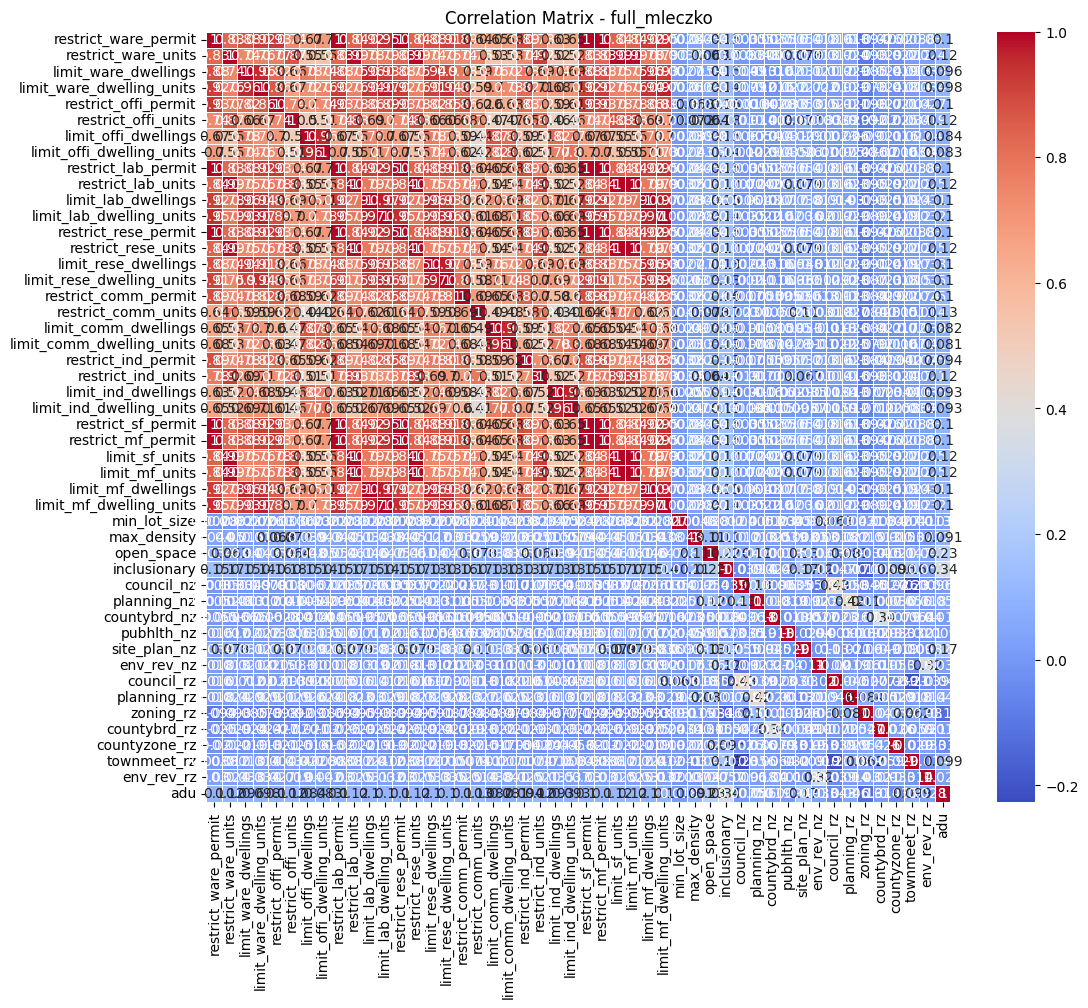

In [60]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - full_mleczko')
plt.show()

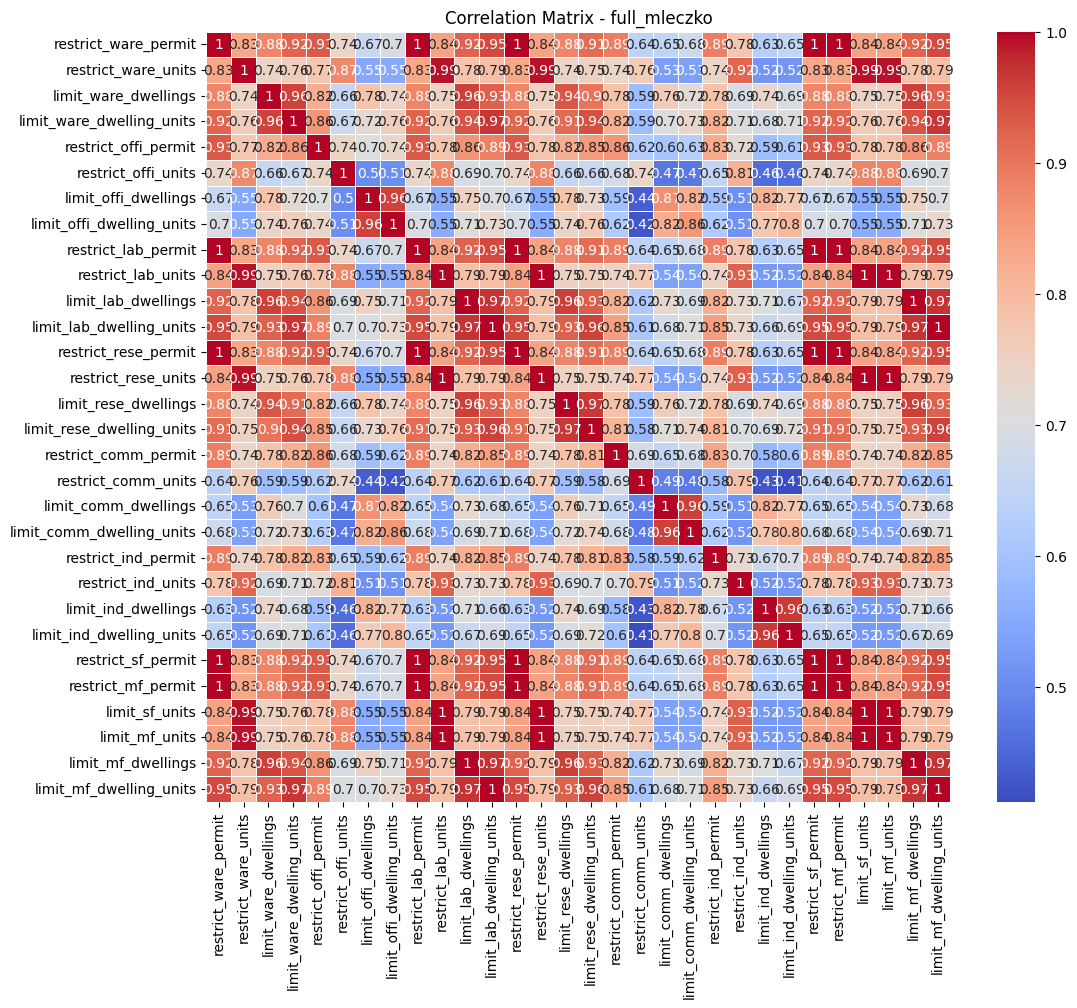

In [61]:
# Filter the rows and columns based on name
filtered_corr_matrix = correlation_matrix.filter(regex='restrict|limit', axis=0).filter(regex='restrict|limit', axis=1)


# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - full_mleczko')
plt.show()

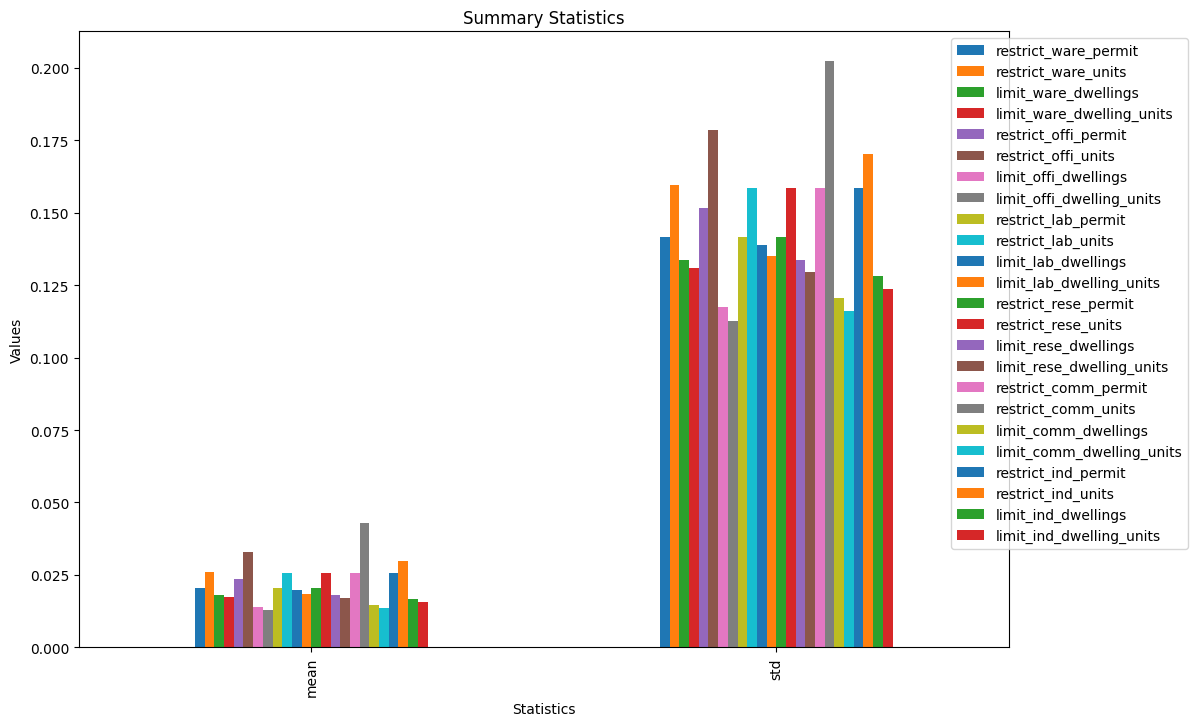

In [62]:
summary_statistics = df_will.describe()
summary_statistics

summary_statistics.drop("count").drop("max").drop("75%").drop("25%").drop("50%").drop("min").plot(kind='bar', figsize=(12, 8))
plt.title('Summary Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Move the legend to the upper right corner with extra space
plt.show()

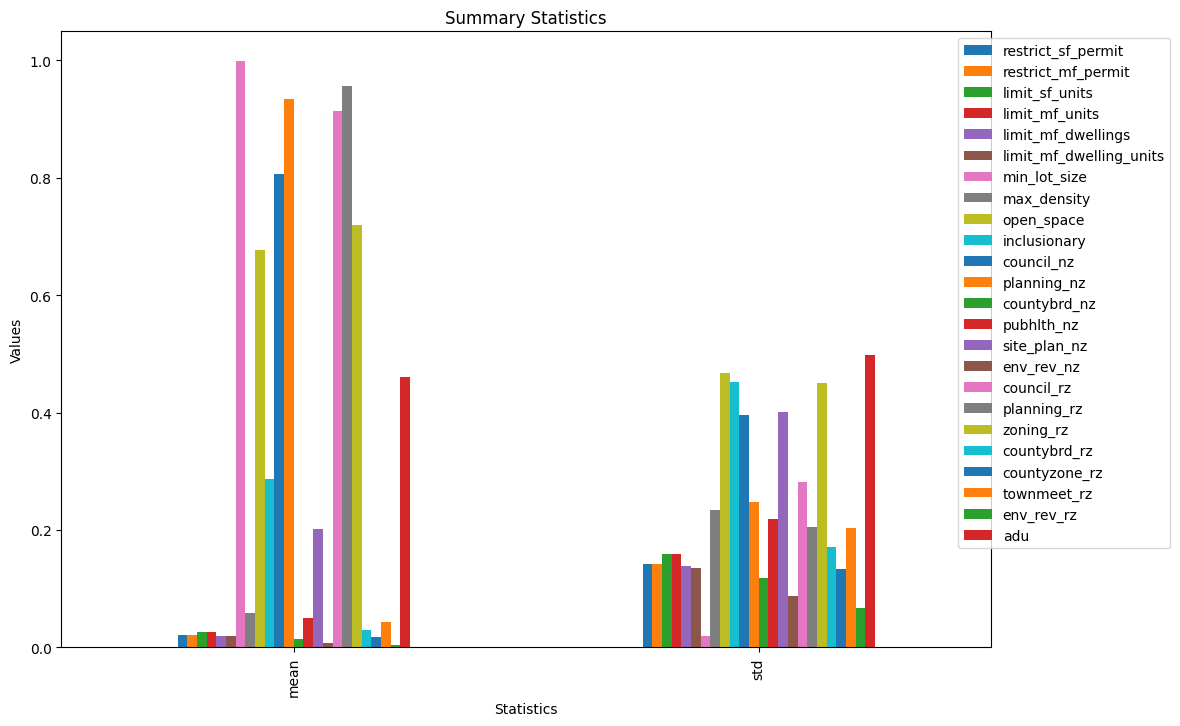

In [63]:
summary_statistics = full_mleczko.describe()
summary_statistics

summary_statistics.drop("count").drop("max").drop("75%").drop("25%").drop("50%").drop("min").plot(kind='bar', figsize=(12, 8))
plt.title('Summary Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Move the legend to the upper right corner with extra space
plt.show()

In [64]:
summary_statistics

,restrict_sf_permit,restrict_mf_permit,limit_sf_units,limit_mf_units,limit_mf_dwellings,limit_mf_dwelling_units,min_lot_size,max_density,open_space,inclusionary,...,site_plan_nz,env_rev_nz,council_rz,planning_rz,zoning_rz,countybrd_rz,countyzone_rz,townmeet_rz,env_rev_rz,adu
count,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,...,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000
mean,0.020462,0.020462,0.025767,0.025767,0.019704,0.018568,0.999621,0.058355,0.676393,0.286093,...,0.201213,0.007579,0.913604,0.956044,0.718833,0.030315,0.018189,0.043198,0.004547,0.460781
std,0.141602,0.141602,0.158470,0.158470,0.139009,0.135018,0.019466,0.234459,0.467941,0.452019,...,0.400983,0.086741,0.281002,0.205036,0.449654,0.171484,0.133659,0.203342,0.067292,0.498554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


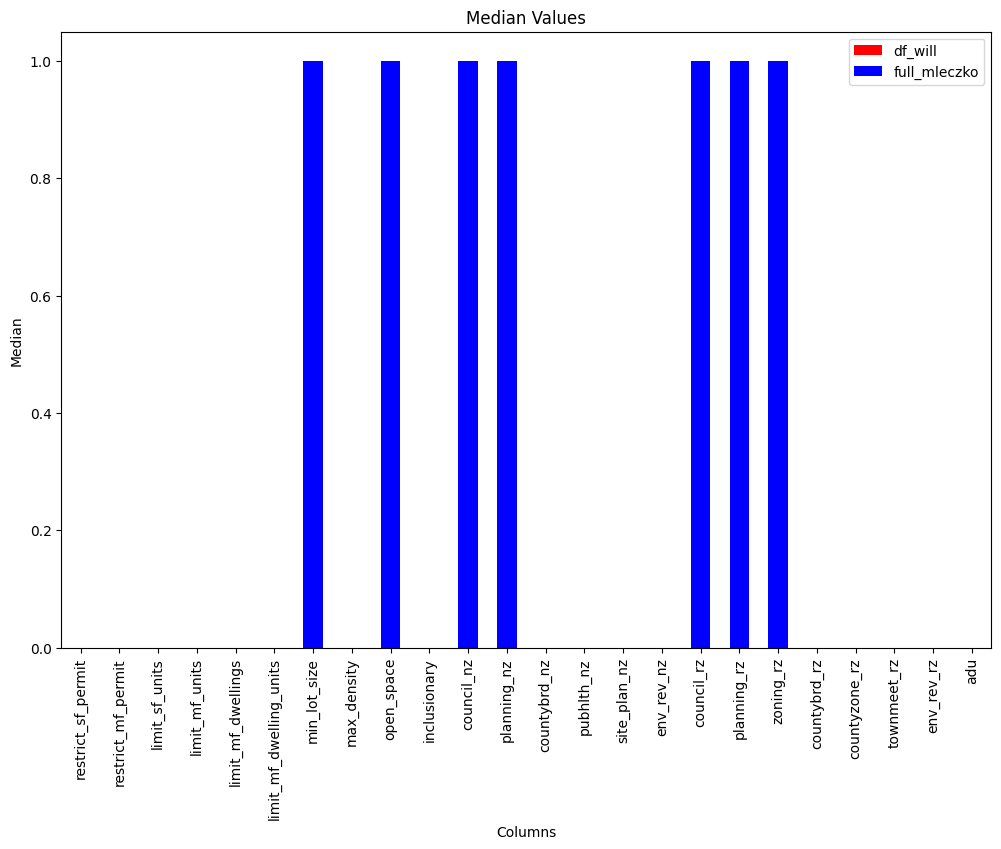

In [65]:
import matplotlib.pyplot as plt

# Define a custom color palette
color_palette = ['red', 'blue']

# Plot the median values of df_will
df_will.median().plot(kind='bar', figsize=(12, 8), label='df_will', color=color_palette[0])

# Plot the median values of full_mleczko
full_mleczko.median().plot(kind='bar', figsize=(12, 8), label='full_mleczko', color=color_palette[1])

# Set the title and labels
plt.title('Median Values')
plt.xlabel('Columns')
plt.ylabel('Median')
plt.legend()

# Show the plot
plt.show()

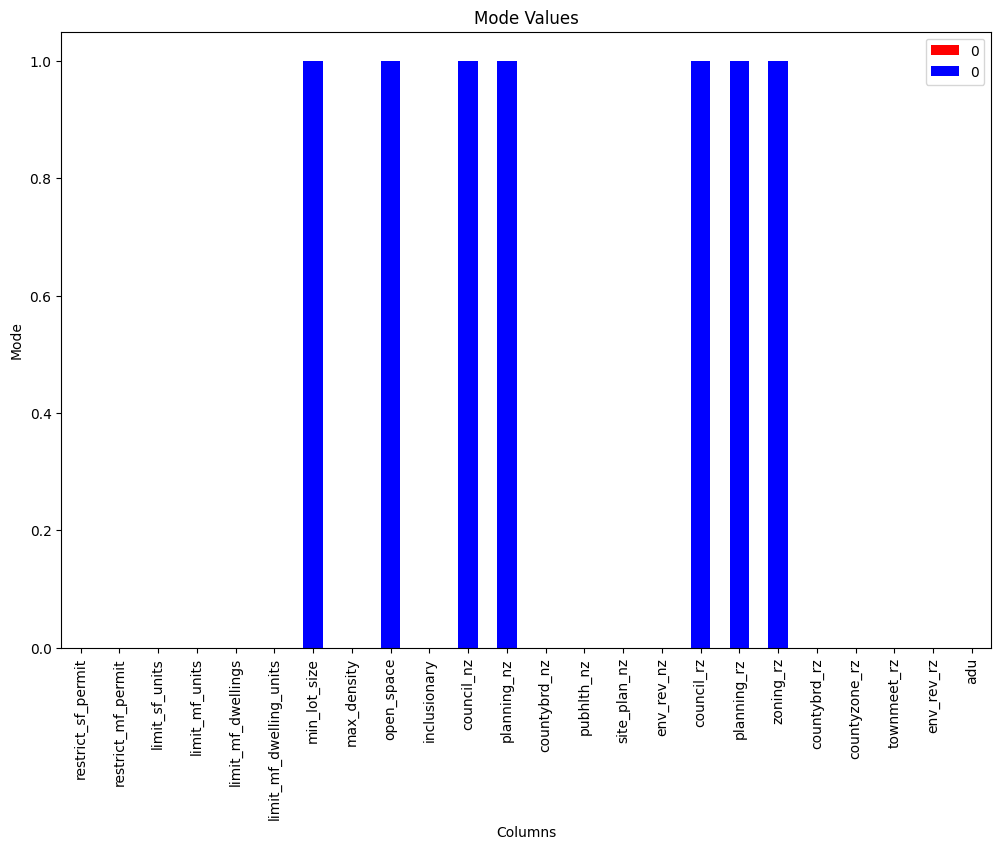

In [72]:
import matplotlib.pyplot as plt

# Define a custom color palette
color_palette = ['red', 'blue']

# Plot the mode values of df_will and full_mleczko in one graph
ax = df_will.mode().T.plot(kind='bar', figsize=(12, 8), label='df_will', color=color_palette[0])
full_mleczko.mode().T.plot(kind='bar', ax=ax, label='full_mleczko', color=color_palette[1])

# Set the title and labels
plt.title('Mode Values')
plt.xlabel('Columns')
plt.ylabel('Mode')
plt.legend()

# Show the plot
plt.show()
